Train, test and validation data normalized to:
[1. 1. 1.]
[1.00057317 0.99995641 0.99929076]
[1.00192988 1.00256451 1.00235689]
Using Device:  cpu , dtype:  torch.float32

Raw data shape:  (31075, 3, 32) 
Labels shape:  (31075,) 
Shape of test set: (4661, 3, 32) 
Shape of train set: (21752, 3, 32) 
Shape of validation set: (4662, 3, 32) 
Unique labels:  [0 1 2 3 4] 
Fraction of test labels:  [0.25, 0.2, 0.2, 0.17, 0.18] 
Fraction of train labels:  [0.24, 0.19, 0.2, 0.18, 0.19] 
dtype of inputs:  torch.float32
End of epoch 1:loss_tr=1.271, loss_val=1.267, train=44.5%, val=44.7%
End of epoch 3:loss_tr=0.964, loss_val=0.974, train=60.8%, val=60.4%
End of epoch 5:loss_tr=0.813, loss_val=0.827, train=67.7%, val=66.7%
End of epoch 7:loss_tr=0.764, loss_val=0.784, train=69.7%, val=68.8%
End of epoch 9:loss_tr=0.705, loss_val=0.723, train=72.0%, val=71.0%
End of epoch 11:loss_tr=0.761, loss_val=0.773, train=69.8%, val=69.2%
End of epoch 13:loss_tr=0.636, loss_val=0.664, train=75.0%, val=73.9%


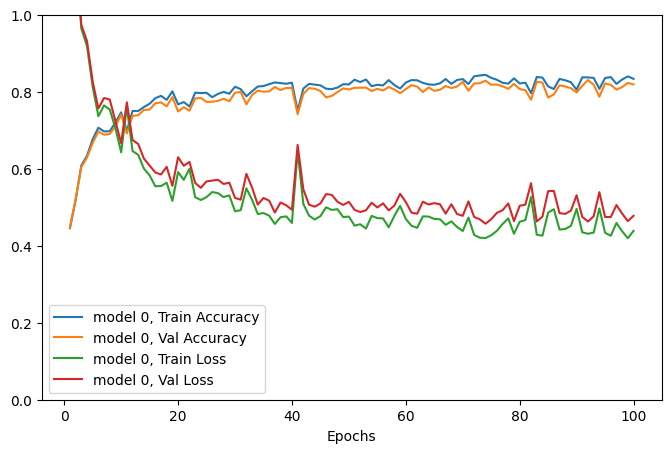

In [1]:
# Look at stardard cnn_lstm for 3 signals
from peratouch.data import Data, test_accuracy
from peratouch.trainer import Trainer, plot_train
from peratouch.networks import cnn_lstm
from peratouch.config import datapath_five_users

D = Data(datapath_five_users, triggers=True, releases=False)
D.group_presses()
D.split()
D.normalize()
D.tensors_to_device()
D.print_shapes()
model = cnn_lstm(input_ch=3, n_filters_start=8, hidden_lstm=16, out_size=5) 
T = Trainer(D)
T.setup(model, learning_rate=5e-2, weight_decay=1e-3, batch_size=2000, max_epochs=100, verbose=True)
T.train_model(model)

plot_train([T])
test_accuracy([D], [model])

Train, test and validation data normalized to:
[1. 1. 1.]
[1.00057317 0.99995641 0.99929076]
[1.00192988 1.00256451 1.00235689]
Using Device:  cpu , dtype:  torch.float32

Raw data shape:  (31075, 3, 32) 
Labels shape:  (31075,) 
Shape of test set: (4661, 3, 32) 
Shape of train set: (21752, 3, 32) 
Shape of validation set: (4662, 3, 32) 
Unique labels:  [0 1 2 3 4] 
Fraction of test labels:  [0.25, 0.2, 0.2, 0.17, 0.18] 
Fraction of train labels:  [0.24, 0.19, 0.2, 0.18, 0.19] 
dtype of inputs:  torch.float32
End of epoch 1:loss_tr=1.557, loss_val=1.560, train=32.0%, val=31.4%
End of epoch 3:loss_tr=1.523, loss_val=1.539, train=32.6%, val=31.9%
End of epoch 5:loss_tr=1.397, loss_val=1.402, train=37.4%, val=37.0%
End of epoch 7:loss_tr=1.284, loss_val=1.295, train=44.3%, val=43.5%
End of epoch 9:loss_tr=1.350, loss_val=1.359, train=41.1%, val=40.6%
End of epoch 11:loss_tr=1.167, loss_val=1.177, train=50.6%, val=50.2%
End of epoch 13:loss_tr=1.124, loss_val=1.133, train=50.5%, val=50.3%


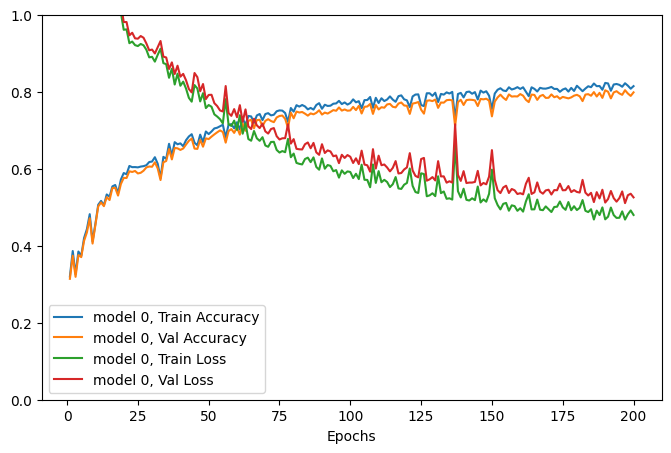

In [3]:
# Case of time-distributed cnn-lstm 
from peratouch.data import Data, test_accuracy
from peratouch.trainer import Trainer, plot_train
from peratouch.networks import cnn_lstm_time_distributed
from peratouch.config import datapath_five_users

input_size = 32 
D = Data(datapath_five_users, triggers=True, releases=False)
D.group_presses()
D.split()
D.normalize()
D.reshape_for_lstm(input_size=input_size, sliding=False)
D.tensors_to_device()
D.print_shapes()
model = cnn_lstm_time_distributed(input_size=input_size, out_size=5, global_pool=False) 
T = Trainer(D)
T.setup(model, learning_rate=1e-2, weight_decay=1e-3, batch_size=2000, max_epochs=200)
T.train_model(model)
plot_train([T])
test_accuracy([D], [model])